In [1]:
import torch
import monai
import numpy as np
from src.constants import *
from src.data.transforms import train_transform, test_transform, all_transforms
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
<class 'monai.transforms.utility.array.AsChannelFirst'>: Class `AsChannelFirst` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


In [2]:

filenames = os.listdir(DATA_PATH + "/test_images") + os.listdir(DATA_PATH + "/images")
filenames = [f for f in filenames if 'mhd' in f]
test_dataset = monai.data.CacheDataset(filenames, transform=all_transforms, num_workers=16)
test_loader = monai.data.DataLoader(test_dataset, batch_size=1, shuffle=True)



Loading dataset: 100%|██████████| 80/80 [14:17<00:00, 10.72s/it]


In [9]:
cs = []

for a in tqdm(test_loader):
    
    cs.append(len(a['mask'].unique()))

100%|██████████| 80/80 [01:41<00:00,  1.26s/it]


In [10]:
cs = np.array(cs)

In [18]:
cs

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

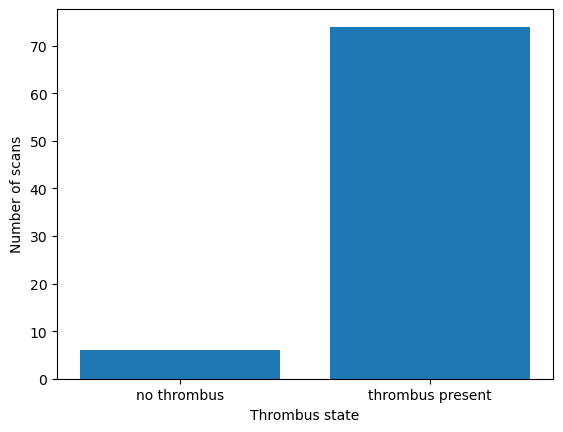

In [23]:
counts = np.array([np.count_nonzero(cs == 2), np.count_nonzero(cs == 3)])

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the counts as a bar chart
ax.bar(['no thrombus', 'thrombus present'], counts)

# Add labels
ax.set_xlabel('Thrombus state')
ax.set_ylabel('Number of scans')

# Show the plot
plt.show()

In [8]:
fore_ground_versus_background = np.array([(c[1] + c[2])/c[0] for c in cs])

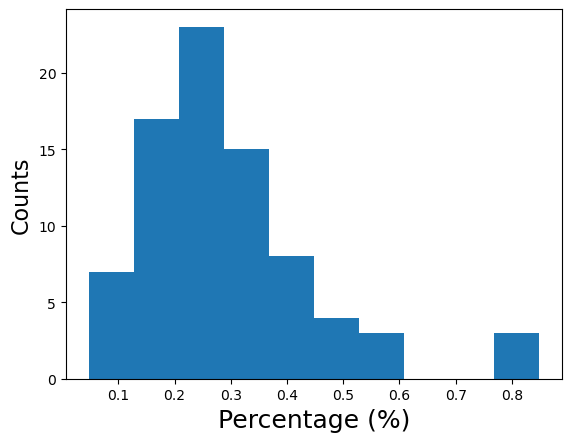

In [20]:
fig = plt.figure()
plt.hist(fore_ground_versus_background * 100)
plt.xlabel('Percentage (%)', fontsize=18)
plt.ylabel('Counts', fontsize=16)
plt.show()

In [13]:
fore_ground_versus_background

array([0.00193303, 0.00316567, 0.00229151, 0.00230975, 0.00438988,
       0.00348898, 0.00317501, 0.00471492, 0.00169712, 0.0050785 ,
       0.00149866, 0.00227939, 0.00116455, 0.00168447, 0.00592159,
       0.00484049, 0.00113935, 0.00215812, 0.00198717, 0.0018737 ,
       0.00304893, 0.00848947, 0.00277381, 0.00205008, 0.00246514,
       0.00282188, 0.00237642, 0.00383466, 0.00342268, 0.00353238,
       0.00400037, 0.00262013, 0.00225222, 0.00311515, 0.00176579,
       0.00266182, 0.00553129, 0.00258533, 0.00208466, 0.00148801,
       0.00382139, 0.00303763, 0.00140507, 0.00380409, 0.00319576,
       0.00250513, 0.00258982, 0.0037346 , 0.00128953, 0.00335194,
       0.00351346, 0.00262588, 0.00122554, 0.00192475, 0.00047157,
       0.00169302, 0.00288023, 0.002531  , 0.00328593, 0.00811377,
       0.00259257, 0.00179334, 0.00368983, 0.00235161, 0.001094  ,
       0.00528575, 0.00072164, 0.00233324, 0.00159316, 0.00149511,
       0.00818   , 0.00258301, 0.00526287, 0.00406986, 0.00344

In [8]:
# other = np.load("stats/fvsb_uncut.npy")

In [9]:
# fore_ground_versus_background / other

In [21]:
for a in test_loader:
    display(a['img'].affine[0, :, :-1].diagonal())

tensor([-0.7207, -0.7207,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.6836, -0.6836,  0.5000], dtype=torch.float64)

tensor([-0.9336, -0.9336,  0.7000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7090, -0.7090,  0.7000], dtype=torch.float64)

tensor([-0.7949, -0.7949,  0.7000], dtype=torch.float64)

tensor([-0.6914, -0.6914,  0.5000], dtype=torch.float64)

tensor([-0.6836, -0.6836,  0.5000], dtype=torch.float64)

tensor([-0.7227, -0.7227,  0.5000], dtype=torch.float64)

tensor([-0.6836, -0.6836,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7266, -0.7266,  0.5000], dtype=torch.float64)

tensor([-0.9219, -0.9219,  0.5000], dtype=torch.float64)

tensor([-0.6973, -0.6973,  0.7000], dtype=torch.float64)

tensor([-0.7820, -0.7820,  2.0000], dtype=torch.float64)

tensor([-0.7148, -0.7148,  0.7000], dtype=torch.float64)

tensor([-0.6836, -0.6836,  0.5000], dtype=torch.float64)

tensor([-0.6387, -0.6387,  0.7000], dtype=torch.float64)

tensor([-0.9766, -0.9766,  0.7000], dtype=torch.float64)

tensor([-0.8184, -0.8184,  0.7000], dtype=torch.float64)

tensor([-0.7148, -0.7148,  0.7000], dtype=torch.float64)

tensor([-0.8984, -0.8984,  0.7000], dtype=torch.float64)

tensor([-0.7031, -0.7031,  0.5000], dtype=torch.float64)

tensor([-0.8027, -0.8027,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7793, -0.7793,  0.5000], dtype=torch.float64)

tensor([-0.7422, -0.7422,  0.5000], dtype=torch.float64)

tensor([-0.7422, -0.7422,  0.8000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.6250], dtype=torch.float64)

tensor([-0.6836, -0.6836,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7539, -0.7539,  0.4500], dtype=torch.float64)

tensor([-0.8340, -0.8340,  0.6250], dtype=torch.float64)

tensor([-0.6680, -0.6680,  0.7000], dtype=torch.float64)

tensor([-0.7031, -0.7031,  0.6250], dtype=torch.float64)

tensor([-0.8086, -0.8086,  0.5000], dtype=torch.float64)

tensor([-0.7031, -0.7031,  0.6250], dtype=torch.float64)

tensor([-0.7240, -0.7240,  0.8000], dtype=torch.float64)

tensor([-0.7480, -0.7480,  0.5000], dtype=torch.float64)

tensor([-0.9121, -0.9121,  0.5000], dtype=torch.float64)

tensor([-0.7422, -0.7422,  0.8000], dtype=torch.float64)

tensor([-0.8457, -0.8457,  0.5005], dtype=torch.float64)

tensor([-0.6953, -0.6953,  0.7000], dtype=torch.float64)

tensor([-0.7832, -0.7832,  0.5000], dtype=torch.float64)

tensor([-0.7461, -0.7461,  0.7000], dtype=torch.float64)

tensor([-0.7148, -0.7148,  0.7000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.8164, -0.8164,  0.5000], dtype=torch.float64)

tensor([-0.7578, -0.7578,  1.0000], dtype=torch.float64)

tensor([-0.6250, -0.6250,  0.5000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.8555, -0.8555,  0.5000], dtype=torch.float64)

tensor([-0.7227, -0.7227,  0.5000], dtype=torch.float64)

tensor([-0.6055, -0.6055,  0.5000], dtype=torch.float64)

tensor([-0.7793, -0.7793,  0.5000], dtype=torch.float64)

tensor([-0.8184, -0.8184,  0.4500], dtype=torch.float64)

tensor([-0.7891, -0.7891,  0.8000], dtype=torch.float64)

tensor([-0.7012, -0.7012,  1.0000], dtype=torch.float64)

tensor([-0.8984, -0.8984,  0.7000], dtype=torch.float64)

tensor([-0.9062, -0.9062,  0.7000], dtype=torch.float64)

tensor([-0.6035, -0.6035,  0.5000], dtype=torch.float64)

tensor([-0.8789, -0.8789,  0.5000], dtype=torch.float64)

tensor([-0.7578, -0.7578,  0.5000], dtype=torch.float64)

tensor([-0.9766, -0.9766,  0.8000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.8242, -0.8242,  0.7000], dtype=torch.float64)

tensor([-0.7793, -0.7793,  0.5000], dtype=torch.float64)

tensor([-0.7832, -0.7832,  0.5000], dtype=torch.float64)

tensor([-0.7031, -0.7031,  0.5000], dtype=torch.float64)

tensor([-0.7500, -0.7500,  0.5000], dtype=torch.float64)

tensor([-0.9766, -0.9766,  0.5000], dtype=torch.float64)

tensor([-0.8105, -0.8105,  0.7000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.7810, -0.7810,  2.0000], dtype=torch.float64)

tensor([-0.7812, -0.7812,  0.5000], dtype=torch.float64)

tensor([-0.9766, -0.9766,  1.2500], dtype=torch.float64)

tensor([-0.7051, -0.7051,  0.5000], dtype=torch.float64)

tensor([-0.7695, -0.7695,  0.5000], dtype=torch.float64)

In [23]:
xs = np.array([a['img'].affine[0, :, :-1].diagonal().numpy() for a in test_loader])

In [30]:
np.mean(xs, axis=0)*1

array([-0.77197128, -0.77197128,  0.62813123])